In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
stock = 'HDFCBANK.NS'
data = yf.download(stock,'2010-01-01','2023-05-19')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,170.000000,172.850006,169.255005,170.570007,153.989594,3050490
2010-01-05,171.000000,172.500000,170.500000,170.720001,154.125031,8386600
2010-01-06,171.399994,172.000000,168.809998,170.835007,154.228790,6639840
2010-01-07,176.839996,176.839996,170.160004,171.279999,154.630569,6123980
2010-01-08,171.199997,172.339996,170.100006,171.505005,154.833710,7085900


In [31]:
price = data['Close']
price

Date
2010-01-04     170.570007
2010-01-05     170.720001
2010-01-06     170.835007
2010-01-07     171.279999
2010-01-08     171.505005
                 ...     
2023-05-12    1667.800049
2023-05-15    1675.800049
2023-05-16    1647.300049
2023-05-17    1638.449951
2023-05-18    1645.000000
Name: Close, Length: 3301, dtype: float64

<Axes: xlabel='Date'>

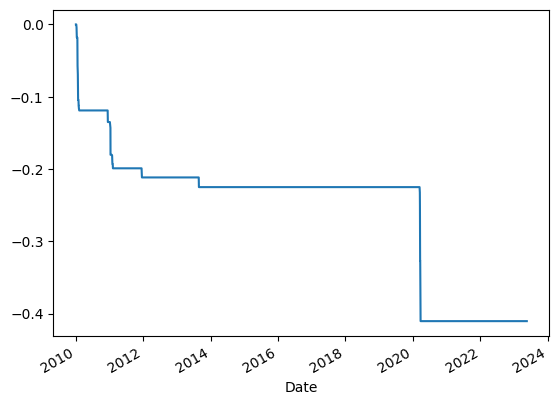

In [32]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [33]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")


Maximum Drawdown for the given period is: -41.05497559765385 %


In [34]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00087937,  0.00067365, ..., -0.0170068 ,
       -0.00537249,  0.00399771])

In [35]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 1.00087937, 1.00155361, ..., 9.65761844, 9.60573302,
       9.64413396])

In [36]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 964.4133958868812%


In [37]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.090396
2012-12-31    0.589786
2013-12-31   -0.018789
2014-12-31    0.429151
2015-12-31    0.137190
2016-12-31    0.114633
2017-12-31    0.552313
2018-12-31    0.133145
2019-12-31    0.199133
2020-12-31    0.129078
2021-12-31    0.030008
2022-12-31    0.100548
2023-12-31    0.010349
Freq: A-DEC, Name: Close, dtype: float64

In [38]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.045216
2010-03-31    0.134151
2010-04-30    0.034626
2010-05-31   -0.055987
                ...   
2023-01-31   -0.015140
2023-02-28   -0.002432
2023-03-31    0.006220
2023-04-30    0.048492
2023-05-31   -0.025243
Freq: M, Name: Close, Length: 161, dtype: float64

In [39]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 17.81651977474123%


In [40]:
sharpe_ratio = (avg_yearly_return - 0.07)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 16.964188630096633


In [41]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-05-31   -0.055987
2010-10-31   -0.084138
2011-01-31   -0.127453
2011-04-30   -0.021442
2011-07-31   -0.032418
                ...   
2022-06-30   -0.029483
2022-09-30   -0.043570
2023-01-31   -0.015140
2023-02-28   -0.002432
2023-05-31   -0.025243
Name: Close, Length: 66, dtype: float64

In [42]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.07)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 27.967208473380687
